In [ ]:
!pip install spacy

In [ ]:
import spacy

In [ ]:
nlp = spacy.blank("en")
doc=nlp("Dr. Strange loves pav bhanji of mumbai as it costs only 2$ per plate.")
for token in doc:
  print(token)

Dr.
Strange
loves
pav
bhanji
of
mumbai
as
it
costs
only
2
$
per
plate
.


Creating blank language object gives a tokenizer and an empty pipeline. We will look more into language pipelines in next tutorial


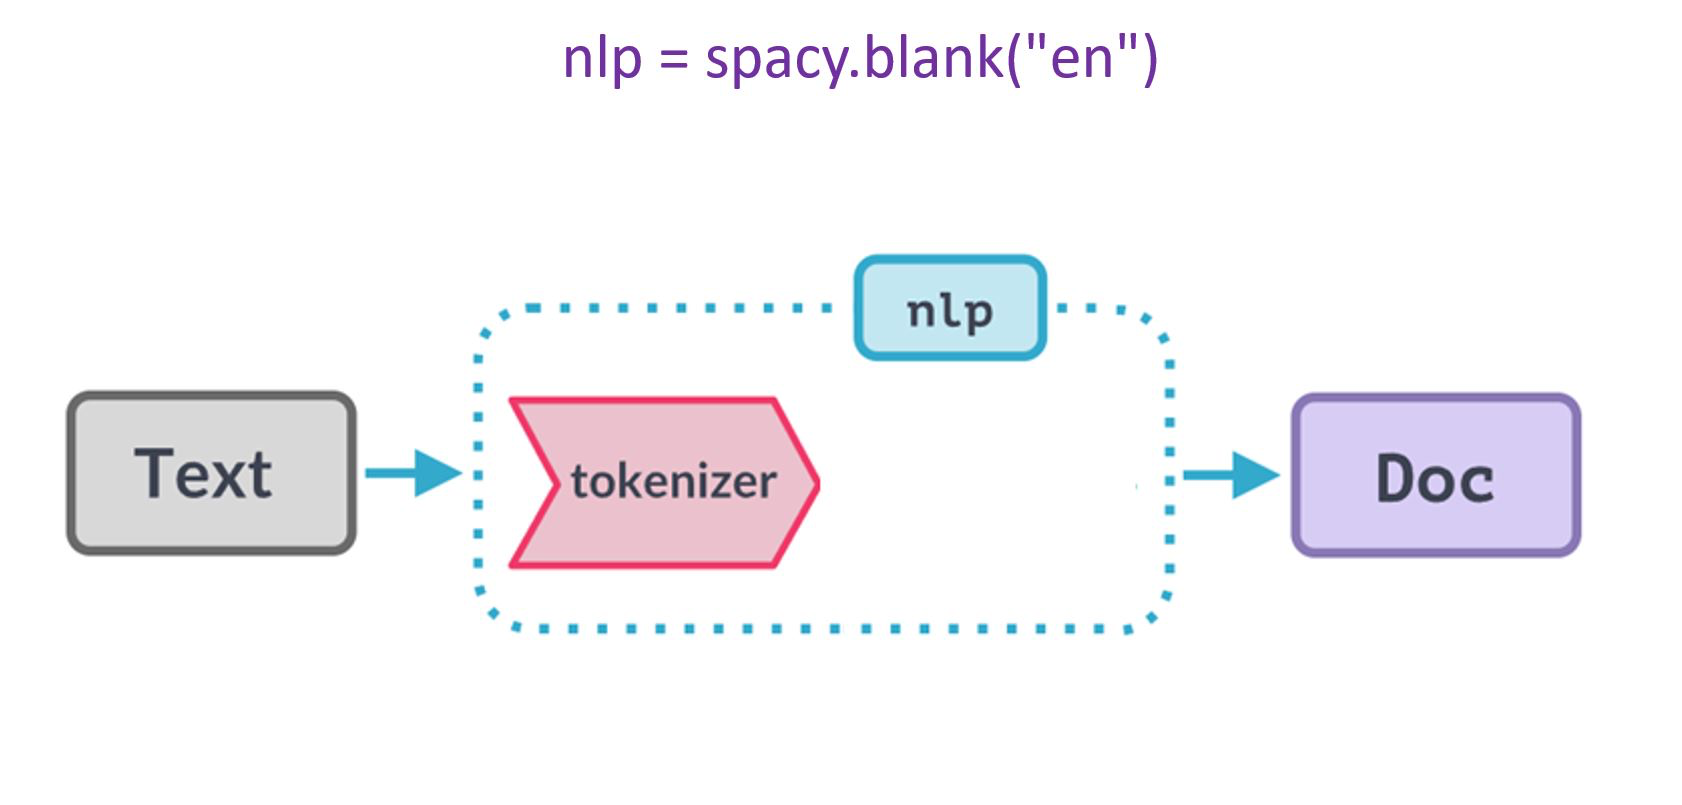

Using index to grab tokens


In [ ]:
doc[0]

Dr.

In [ ]:
token=doc[1]
token.text #.text attribute returns the original string representation of that specific token

'Strange'

In [ ]:
dir(token) #to get a list of all attributes and methods

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 'ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_dep',
 'has_extension',
 'has_head',
 'has_morph',
 'has_vector',
 'head',
 'i',
 'idx',
 'iob_strings',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_end',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang

In [ ]:
type(nlp)

spacy.lang.en.English

In [ ]:
type(doc)

spacy.tokens.doc.Doc

In [ ]:
type(token)

spacy.tokens.token.Token

In [ ]:
nlp.pipe_names

[]

Span object

In [ ]:
span=doc[0:5]
span

Dr. Strange loves pav bhanji

In [ ]:
type(span)

spacy.tokens.span.Span

Token Attributes

In [ ]:
doc=nlp("Tony gave two $ to Peter.")

In [ ]:
token0=doc[0]
token0

Tony

In [ ]:
token0.is_alpha

True

In [ ]:
token0.like_num

False

In [ ]:
token2=doc[2]
token2

two

In [ ]:
token2.like_num

True

In [ ]:
token3=doc[3]
token3

$

In [ ]:
token.like_num

False

In [ ]:
token3.is_currency

True

In [ ]:
for token in doc:
  print(token, "==>", "idnex: ", token.i, "is_alpha", token.is_alpha,"is_punct:", token.is_punct,"like_num:", token.like_num, "is_currency:", token.is_currency,)

Tony ==> idnex:  0 is_alpha True is_punct: False like_num: False is_currency: False
gave ==> idnex:  1 is_alpha True is_punct: False like_num: False is_currency: False
two ==> idnex:  2 is_alpha True is_punct: False like_num: True is_currency: False
$ ==> idnex:  3 is_alpha False is_punct: False like_num: False is_currency: True
to ==> idnex:  4 is_alpha True is_punct: False like_num: False is_currency: False
Peter ==> idnex:  5 is_alpha True is_punct: False like_num: False is_currency: False
. ==> idnex:  6 is_alpha False is_punct: True like_num: False is_currency: False


Collecting email ids of students from students information sheet

In [ ]:
with open("students.txt") as f:
  text=f.readlines()
text

['Dayton high school, 8th grade students information\n',
 '==================================================\n',
 '\n',
 'Name\tbirth day   \temail\n',
 '-----\t------------\t------\n',
 'Virat   5 June, 1882    virat@kohli.com\n',
 'Maria\t12 April, 2001  maria@sharapova.com\n',
 'Serena  24 June, 1998   serena@williams.com \n',
 'Joe      1 May, 1997    joe@root.com\n',
 '\n',
 '\n',
 '\n']

In [ ]:
text=" ".join(text)
text

'Dayton high school, 8th grade students information\n ==================================================\n \n Name\tbirth day   \temail\n -----\t------------\t------\n Virat   5 June, 1882    virat@kohli.com\n Maria\t12 April, 2001  maria@sharapova.com\n Serena  24 June, 1998   serena@williams.com \n Joe      1 May, 1997    joe@root.com\n \n \n \n'

In [ ]:
doc=nlp(text)
emails=[]
for token in doc:
  if token.like_email:
    emails.append(token.text)
emails

['virat@kohli.com',
 'maria@sharapova.com',
 'serena@williams.com',
 'joe@root.com']

Support in other languages
Spacy support many language models. Some of them do not support pipelines though! https://spacy.io/usage/models#languages

In [ ]:
nlp=spacy.blank("hi")

doc = nlp("भैया जी! 5000 ₹ उधार थे वो वापस देदो")
for token in doc:
    print(token, token.is_currency, token.is_digit)

भैया False False
जी False False
! False False
5000 False True
₹ True False
उधार False False
थे False False
वो False False
वापस False False
देदो False False


Customizing tokenizer

In [ ]:
from spacy.symbols import ORTH

nlp = spacy.blank("en")
doc = nlp("gimme double cheese extra large healthy pizza")
tokens = [token.text for token in doc]
tokens

['gimme', 'double', 'cheese', 'extra', 'large', 'healthy', 'pizza']

In [ ]:
nlp.tokenizer.add_special_case("gimme", [
    {ORTH: "gim"},
    {ORTH: "me"},
])
doc = nlp("gimme double cheese extra large healthy pizza")
tokens = [token.text for token in doc]
tokens

['gim', 'me', 'double', 'cheese', 'extra', 'large', 'healthy', 'pizza']

Sentence Tokenization or Segmentation

In [ ]:
doc = nlp("Dr. Strange loves pav bhaji of mumbai. Hulk loves chat of delhi")
for sentence in doc.sents:
    print(sentence)

ValueError: [E030] Sentence boundaries unset. You can add the 'sentencizer' component to the pipeline with: `nlp.add_pipe('sentencizer')`. Alternatively, add the dependency parser or sentence recognizer, or set sentence boundaries by setting `doc[i].is_sent_start`.

In [ ]:
nlp.pipeline

[]

In [ ]:
nlp.add_pipe('sentencizer')

In [ ]:
doc = nlp("Dr. Strange loves pav bhaji of mumbai. Hulk loves chat of delhi")
for sentence in doc.sents:
    print(sentence)

Dr. Strange loves pav bhaji of mumbai.
Hulk loves chat of delhi


In [ ]:
nlp.pipeline

[('sentencizer', <spacy.pipeline.sentencizer.Sentencizer at 0x79b0ebc89d90>)]